In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
data=pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
X = np.array(data.loc[ :, data.columns != 'output'])
y = np.array(data['output'])

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.fit_transform(x_test)

In [38]:
class NeuralNetworkFromScratch:
  def __init__(self,LR,x_train,y_train,x_test,y_test):
    self.w=np.random.rand(x_train.shape[1])
    self.b=np.random.rand()
    self.LR=LR
    self.x_train=x_train
    self.y_train=y_train
    self.x_test=x_test
    self.y_test=y_test
    self.L_train=[]
    self.L_test=[]
  def activation_sigmoid_function(self,x):
    return 1/(1+np.exp(-x))
  def dactivation(self,x):
    return self.activation_sigmoid_function(x) * (1 - self.activation_sigmoid_function(x))

  def forward(self ,x):
    hidden1=np.dot(x,self.w)+self.b
    activate=self.activation_sigmoid_function(hidden1)
    return activate
  def backword(self,x,y_true):
    hidden1=np.dot(x,self.w)+self.b
    y_predict=self.forward(x)
    dl_predict=2*(y_predict-y_true)
    dpred_dhidden1 = self.dactivation(hidden1)
    dhidden1_db = 1
    dhidden1_dw = x
    dL_db = dl_predict * dpred_dhidden1 * dhidden1_db
    dL_dw = dl_predict * dpred_dhidden1 * dhidden1_dw
    return dL_db, dL_dw
  def optimizer(self,dL_db,dl_dw):
    self.b=self.b-dL_db*self.LR
    self.w=self.w-dl_dw*self.LR
  def train(self,ITERATIONS):
    for i in range(ITERATIONS):
      random_pos = np.random.randint(len(self.x_train))
      y_train_true=self.y_train[random_pos]
      y_train_predict=self.forward(self.x_train[random_pos])
      l=np.sum(np.square(y_train_predict-y_train_true))
      self.L_train.append(l)
      dL_db, dL_dw = self.backword(
                self.x_train[random_pos], self.y_train[random_pos]
            )
      self.optimizer(dL_db, dL_dw)
      L_sum=0
    for j in range(len(self.x_test)):
                y_true = self.y_test[j]
                y_pred = self.forward(self.x_test[j])
                L_sum += np.square(y_pred - y_true)
                self.L_test.append(L_sum)
    return "training successfully finished"



In [39]:
LR = 0.1
ITERATIONS = 1000
nn=NeuralNetworkFromScratch(LR=LR, x_train=x_train_scale,y_train=y_train,x_test=x_test_scale, y_test=y_test)
nn.train(ITERATIONS=ITERATIONS)

'training successfully finished'

array([[25,  4],
       [ 3, 29]])

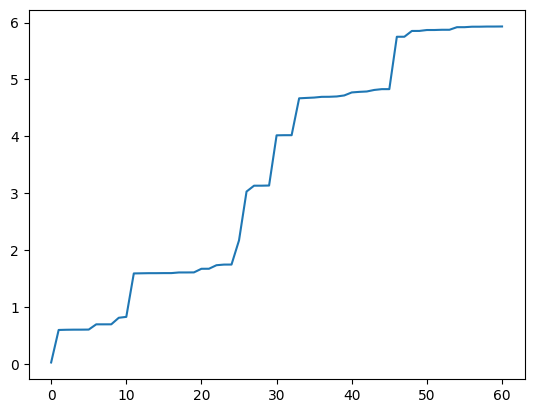

In [40]:
sns.lineplot(x=list(range(len(nn.L_test))), y=nn.L_test)
total = x_test_scale.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = y_test[i]
    y_pred = np.round(nn.forward(x_test_scale[i]))
    y_preds.append(y_pred)
    correct += 1 if y_true == y_pred else 0

acc = correct / total

from collections import Counter
Counter(y_test)

confusion_matrix(y_true = y_test, y_pred = y_preds)